In [ ]:
import numpy as np 
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.cluster import KMeans
import xgboost as xgb

train = pd.read_csv('train_updated.csv')
train = pd.DataFrame(train)
train.set_index('deviceid')

#pd.set_option('display.max_columns', 10)
#pd.set_option('display.max_rows', 10)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   deviceid                     40500 non-null  int64  
 1   avg_time_charging_lag1       40500 non-null  float64
 2   avg_time_charging_lag2       40500 non-null  float64
 3   avg_time_charging_lag3       40500 non-null  float64
 4   avg_time_charging_lag7       40434 non-null  float64
 5   charging_rate_lag3           40500 non-null  float64
 6   charging_rate_lag7           40488 non-null  float64
 7   avg_time_discharging_lag1    40500 non-null  float64
 8   avg_time_discharging_lag2    40500 non-null  float64
 9   avg_time_discharging_lag3    40500 non-null  float64
 10  avg_time_discharging_lag7    40434 non-null  float64
 11  discharging_rate_lag3        40500 non-null  float64
 12  discharging_rate_lag7        40488 non-null  float64
 13  fail_7          

In [ ]:
train.head()

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
0,28647,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,-1.163333,0.033333,0,False,4.99,5.85,24.35,31.02,43.42,79.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.360000,1.573333,0.816667,-0.173333,-0.070000,-1.603333,-0.166667,50.250000,49.750000,49.000000,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,4/1/21,10/6/19
1,36175,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,-0.066667,-2.653333,0,False,13.64,20.37,5.65,4.77,19.41,24.33,35.92,59.38,4.49,4.12,44.18,72.46,27.45,49.02,10.89,18.93,21.39,35.90,NaN,NaN,-4.593333,0.450000,-3.063333,-0.103333,0.216667,0.000000,-1.010000,56.285714,56.000000,36.857143,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,4/1/21,10/27/19
2,16107,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,-2.643333,0.686667,0,False,25.01,40.69,6.03,6.06,5.72,5.73,22.46,31.82,33.92,58.87,45.87,76.36,5.78,6.23,5.13,4.37,4.73,3.50,26.79,41.29,-0.050000,0.240000,0.000000,0.216667,-0.026667,0.000000,-0.013333,80.380952,80.333333,2.333333,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,4/1/21,10/31/19
3,27362,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,-0.166667,0.033333,0,False,4.71,3.74,4.74,3.73,24.01,52.99,5.09,5.32,4.45,4.22,22.14,30.51,4.39,4.15,4.71,3.82,13.27,18.62,4.97,4.16,0.013333,0.406667,-0.293333,-0.046667,-0.030000,0.460000,1.340000,91.736842,91.684211,10.789474,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,4/1/21,10/1/19
4,19463,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,0.066667,-1.030000,0,True,40.36,82.70,15.47,24.21,45.64,76.42,26.63,45.04,27.99,40.57,5.01,6.52,5.47,4.64,5.28,5.16,25.10,47.76,21.62,37.29,-0.353333,0.983333,-0.006667,-1.790000,0.016667,1.606667,0.013333,71.066667,70.733333,14.266667,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,4/1/21,9/13/19


In [ ]:
#trainlag is df with lag columns
trainlag = train[['avg_time_charging_lag1', 'avg_time_charging_lag2', 'avg_time_charging_lag3', 'avg_time_charging_lag4', 
            'avg_time_charging_lag5', 'avg_time_charging_lag6', 'avg_time_charging_lag7', 'avg_time_charging_lag8', 
            'avg_time_charging_lag9', 'avg_time_charging_lag10', 'avg_time_charging_lag11', 'avg_time_charging_lag12', 
            'avg_time_charging_lag13', 'avg_time_charging_lag14',

            'avg_time_discharging_lag1', 'avg_time_discharging_lag2', 'avg_time_discharging_lag3', 'avg_time_discharging_lag4',
            'avg_time_discharging_lag5', 'avg_time_discharging_lag6', 'avg_time_discharging_lag7', 'avg_time_discharging_lag8',
            'avg_time_discharging_lag9', 'avg_time_discharging_lag10', 'avg_time_discharging_lag11', 'avg_time_discharging_lag12', 
            'avg_time_discharging_lag13', 'avg_time_discharging_lag14',

            'charging_rate_lag3', 'charging_rate_lag4', 'charging_rate_lag5', 'charging_rate_lag6', 'charging_rate_lag7',

            'discharging_rate_lag3', 'discharging_rate_lag4', 'discharging_rate_lag5', 'discharging_rate_lag6', 
            'discharging_rate_lag7', 'discharging_rate_lag8']].copy()

In [ ]:
trainlag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   avg_time_charging_lag1      40500 non-null  float64
 1   avg_time_charging_lag2      40500 non-null  float64
 2   avg_time_charging_lag3      40500 non-null  float64
 3   avg_time_charging_lag4      40500 non-null  float64
 4   avg_time_charging_lag5      40493 non-null  float64
 5   avg_time_charging_lag6      40472 non-null  float64
 6   avg_time_charging_lag7      40434 non-null  float64
 7   avg_time_charging_lag8      40338 non-null  float64
 8   avg_time_charging_lag9      40126 non-null  float64
 9   avg_time_charging_lag10     39703 non-null  float64
 10  avg_time_charging_lag11     38914 non-null  float64
 11  avg_time_charging_lag12     37743 non-null  float64
 12  avg_time_charging_lag13     36118 non-null  float64
 13  avg_time_charging_lag14     338

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


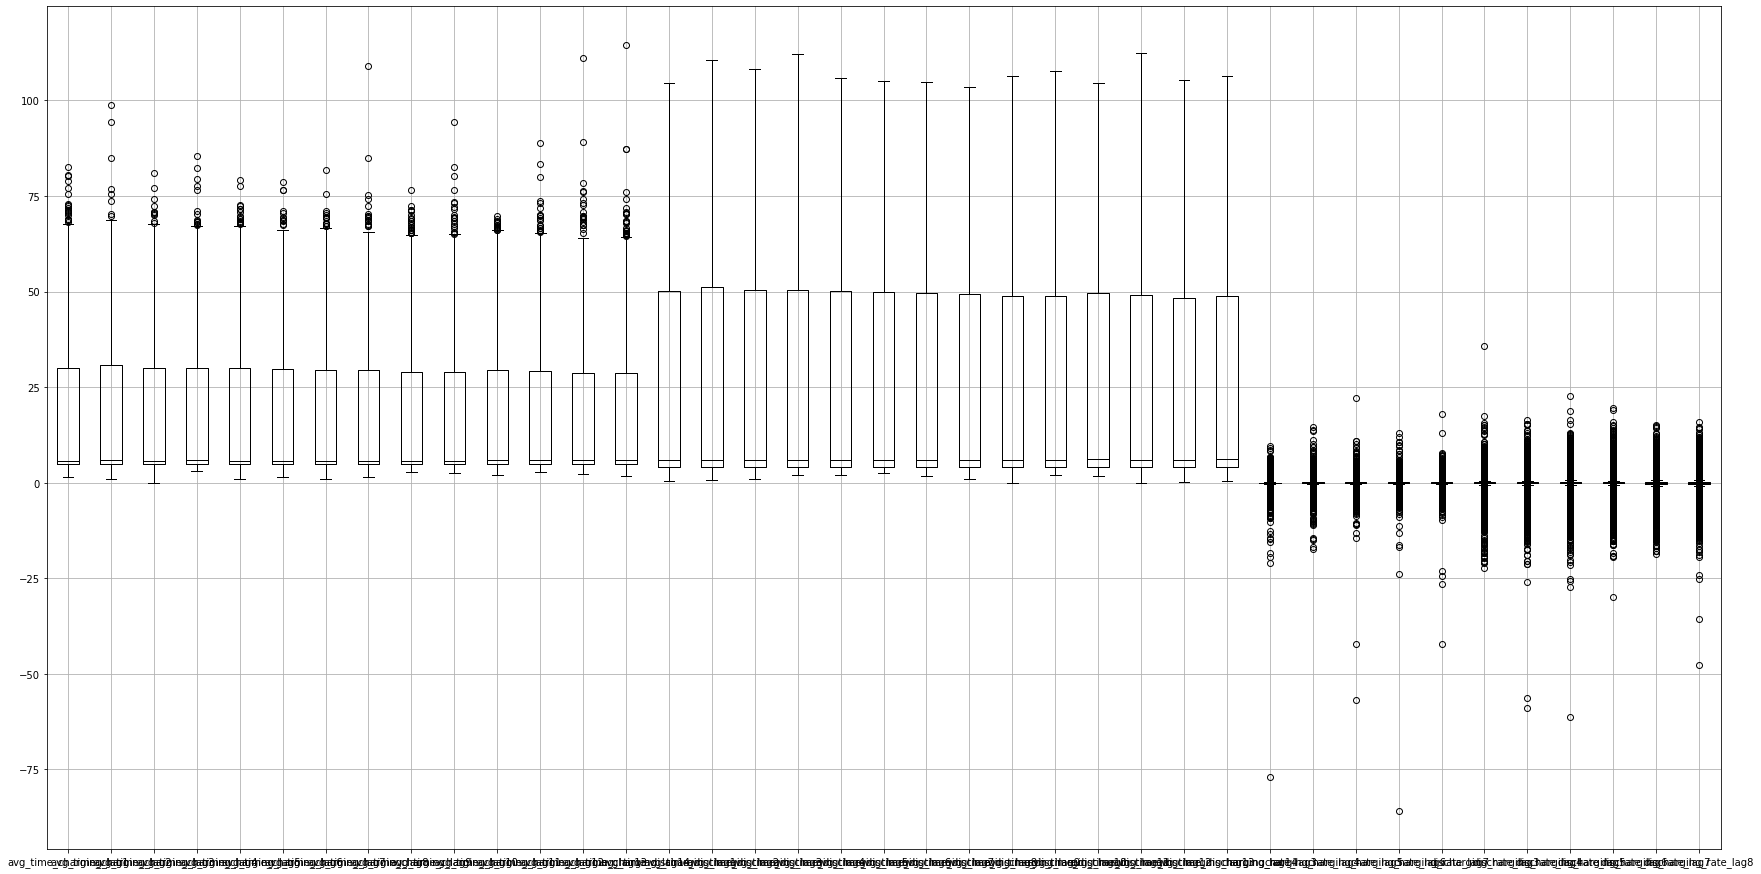

In [ ]:
trainlag.boxplot(figsize=(30,15.5))
plt.show()

In [ ]:
#df2 is df without lag columns
train2 = train[['deviceid','chargecycles', 'dischargecycles', 'total_off_time',
       'number_times_restart', 'avg_volt_change_charging',
       'avg_volt_change_discharging', 'avg_time_charging',
       'avg_time_discharging', 'max_voltage_day', 'piececount', 'cycle_time', 'Date Deployed', 
          'charge_cycle_time_below_12', 'fail_7']]
train2 = train2.set_index('deviceid')

In [ ]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40500 entries, 28647 to 20795
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   chargecycles                 40500 non-null  float64
 1   dischargecycles              40500 non-null  float64
 2   total_off_time               40500 non-null  float64
 3   number_times_restart         40500 non-null  float64
 4   avg_volt_change_charging     40500 non-null  float64
 5   avg_volt_change_discharging  40500 non-null  float64
 6   avg_time_charging            40500 non-null  float64
 7   avg_time_discharging         40500 non-null  float64
 8   max_voltage_day              40500 non-null  float64
 9   piececount                   40500 non-null  float64
 10  cycle_time                   40500 non-null  float64
 11  Date Deployed                40500 non-null  object 
 12  charge_cycle_time_below_12   40500 non-null  bool   
 13  fail_7      

In [ ]:
train2

,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,Date Deployed,charge_cycle_time_below_12,fail_7
deviceid,,,,,,,,,,,,,,
28647,50.250000,49.750000,49.000000,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,10/6/19,False,0
36175,56.285714,56.000000,36.857143,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,10/27/19,False,0
16107,80.380952,80.333333,2.333333,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,10/31/19,False,0
27362,91.736842,91.684211,10.789474,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,10/1/19,False,0
19463,71.066667,70.733333,14.266667,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,9/13/19,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16284,83.434783,82.956522,17.739130,2.782609,365.399130,354.915217,13.880435,23.077391,4162.913043,70.181818,36.957826,9/5/19,True,1
49732,64.866667,64.733333,0.266667,1.066667,378.554667,374.952667,17.673333,28.495333,4181.600000,11.888889,46.168667,9/18/19,True,1
43158,84.727273,84.590909,6.727273,2.227273,345.429091,342.216818,17.871818,29.766364,4157.045455,26.400000,47.638182,10/18/19,True,1


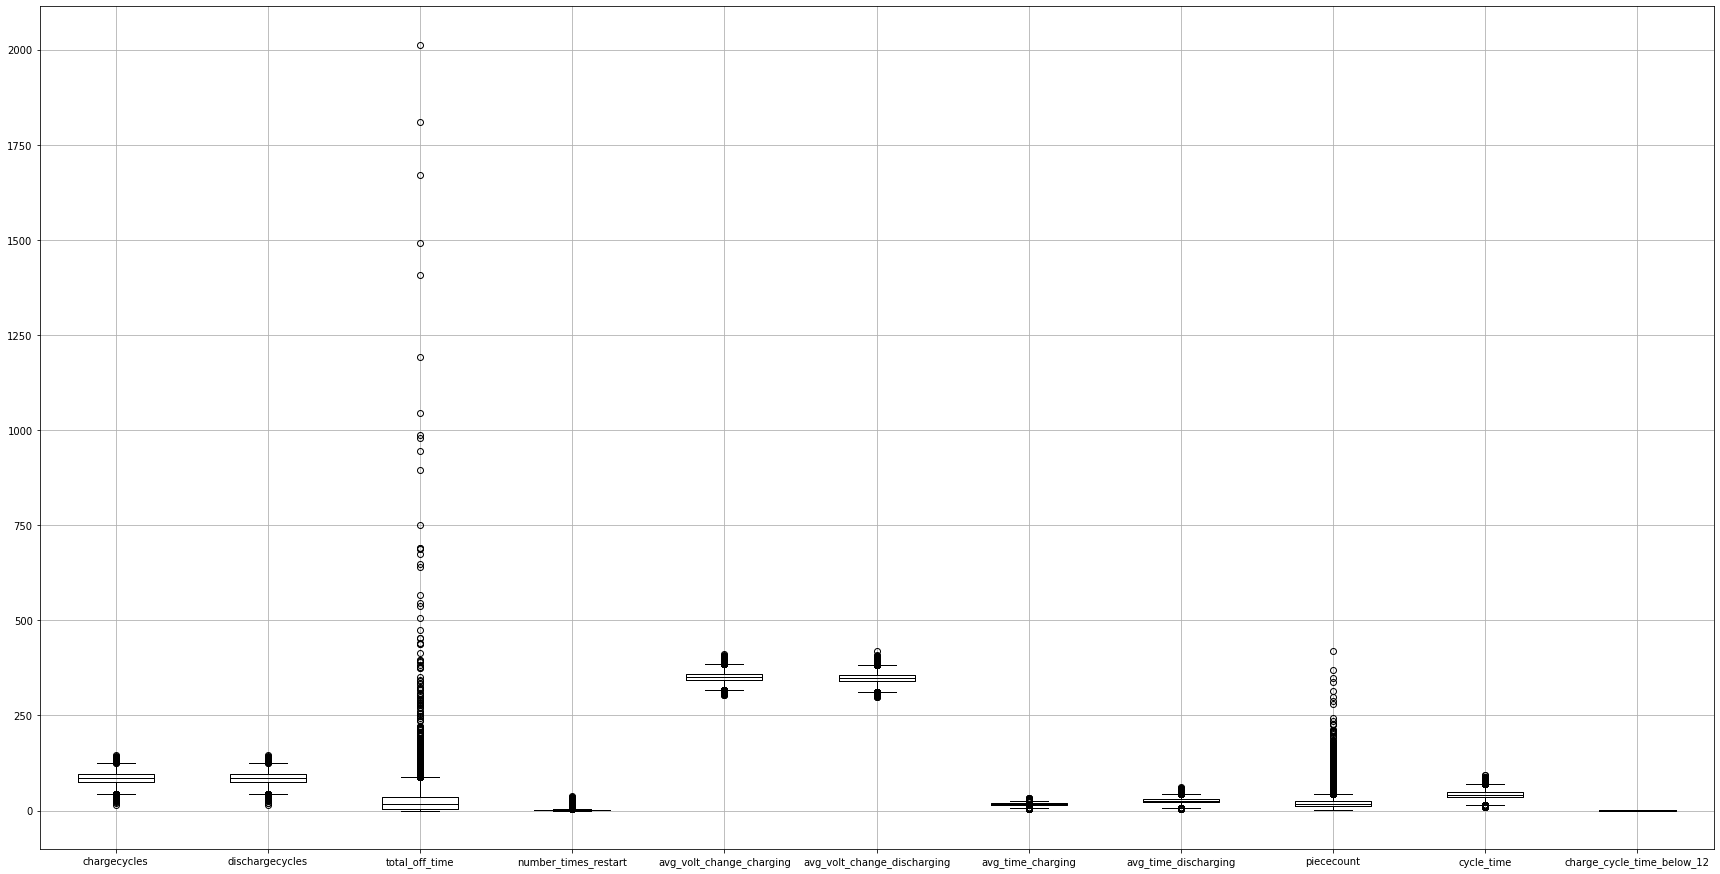

In [ ]:
train2.drop(columns=["fail_7", "max_voltage_day"]).boxplot(figsize=(30,15.5))
plt.show()

In [ ]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40500 entries, 28647 to 20795
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   chargecycles                 40500 non-null  float64
 1   dischargecycles              40500 non-null  float64
 2   total_off_time               40500 non-null  float64
 3   number_times_restart         40500 non-null  float64
 4   avg_volt_change_charging     40500 non-null  float64
 5   avg_volt_change_discharging  40500 non-null  float64
 6   avg_time_charging            40500 non-null  float64
 7   avg_time_discharging         40500 non-null  float64
 8   max_voltage_day              40500 non-null  float64
 9   piececount                   40500 non-null  float64
 10  cycle_time                   40500 non-null  float64
 11  Date Deployed                40500 non-null  object 
 12  charge_cycle_time_below_12   40500 non-null  bool   
 13  fail_7      

#### Split the data by response, fail_7

In [ ]:
fail = train2[train2.fail_7 == 1].copy()
nofail = train2[train2.fail_7 == 0].copy()

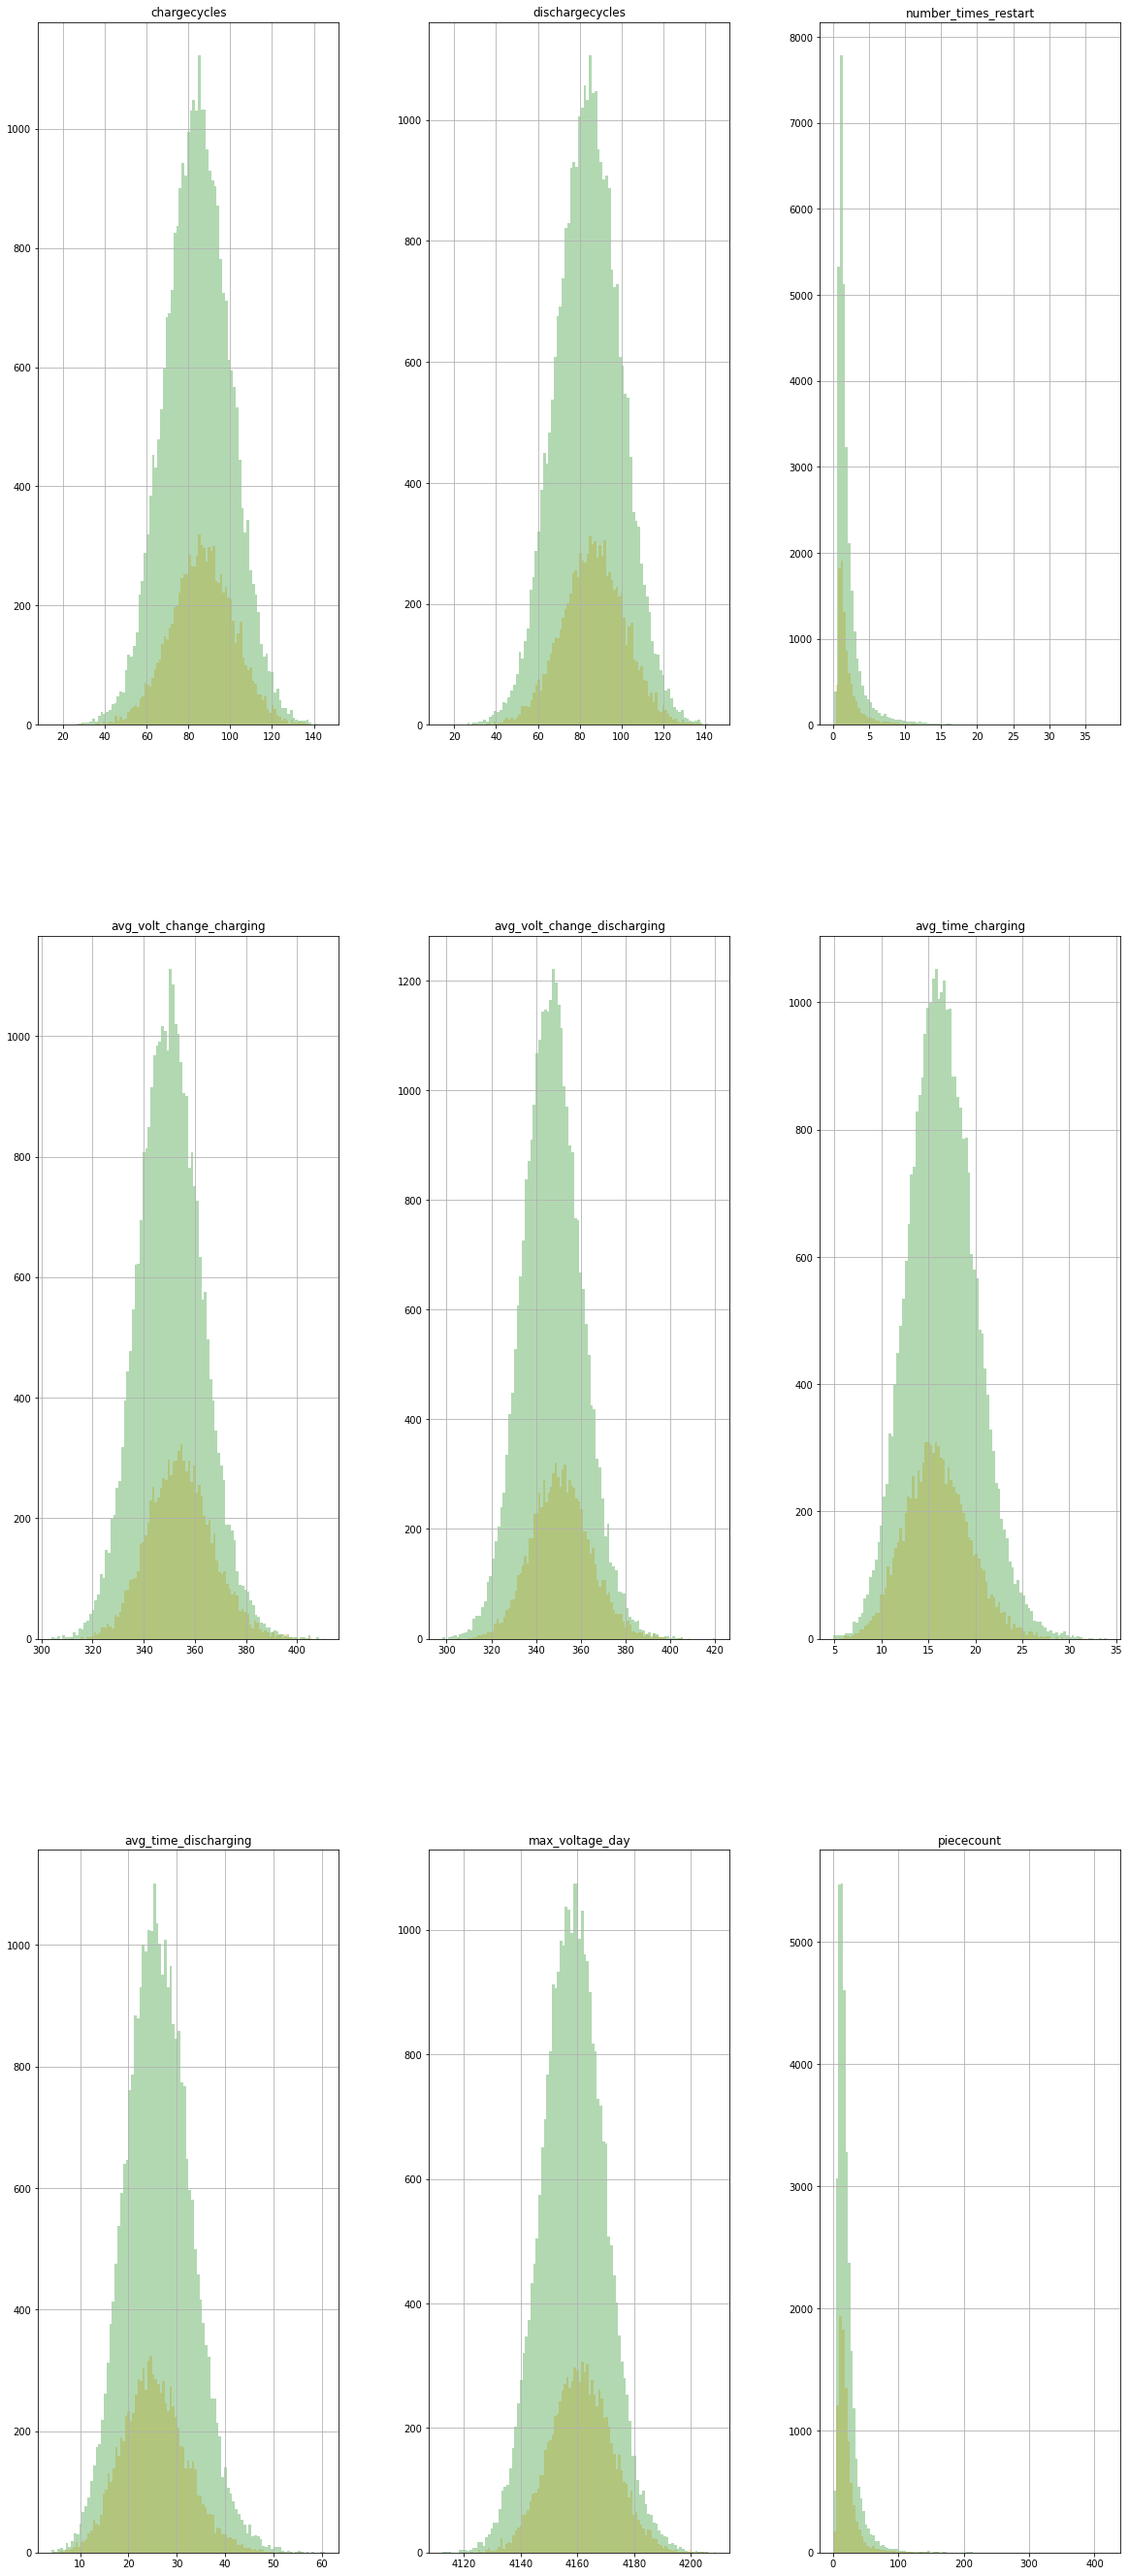

In [ ]:
index = train2.select_dtypes(include=["float","int"]).columns
index = index.drop('total_off_time')
cols=[i for i in index]

fig, axes = plt.subplots(len(cols)//3, 3, figsize=(20, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        fail.hist(column = cols[i], bins = 100, ax=axis, color = 'orange', alpha = 0.3)
        nofail.hist(column = cols[i], bins = 100, ax=axis, color = 'green', alpha = 0.3)
        i = i+1

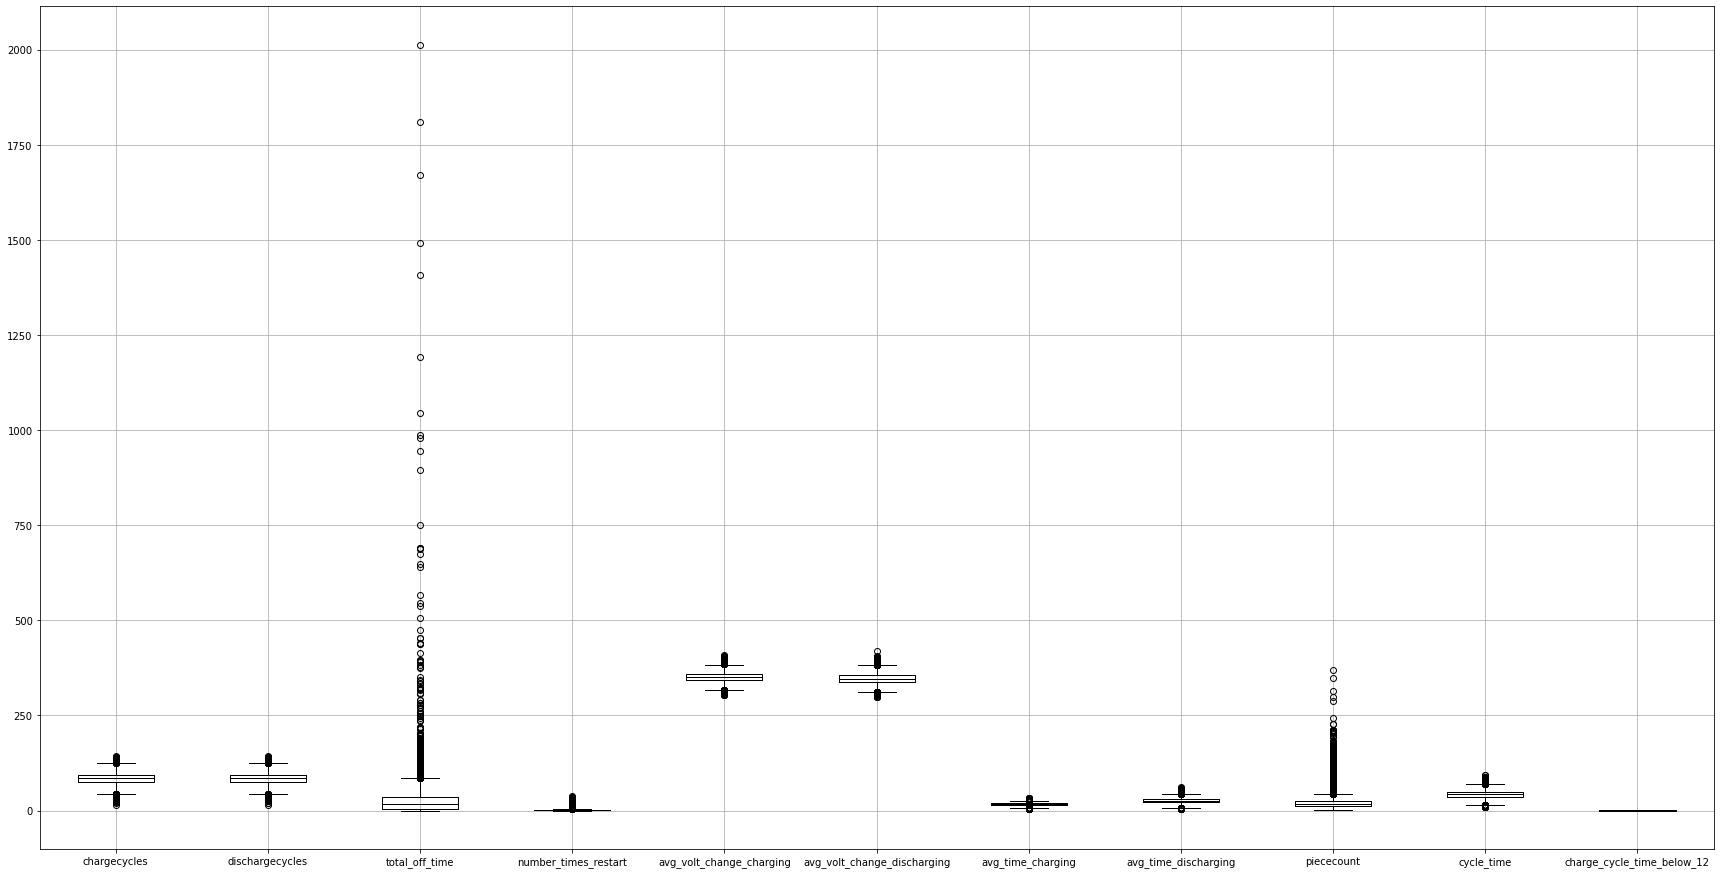

In [ ]:
nofail.drop(columns=["fail_7", "max_voltage_day"]).boxplot(figsize=(30,15.5))
plt.show()

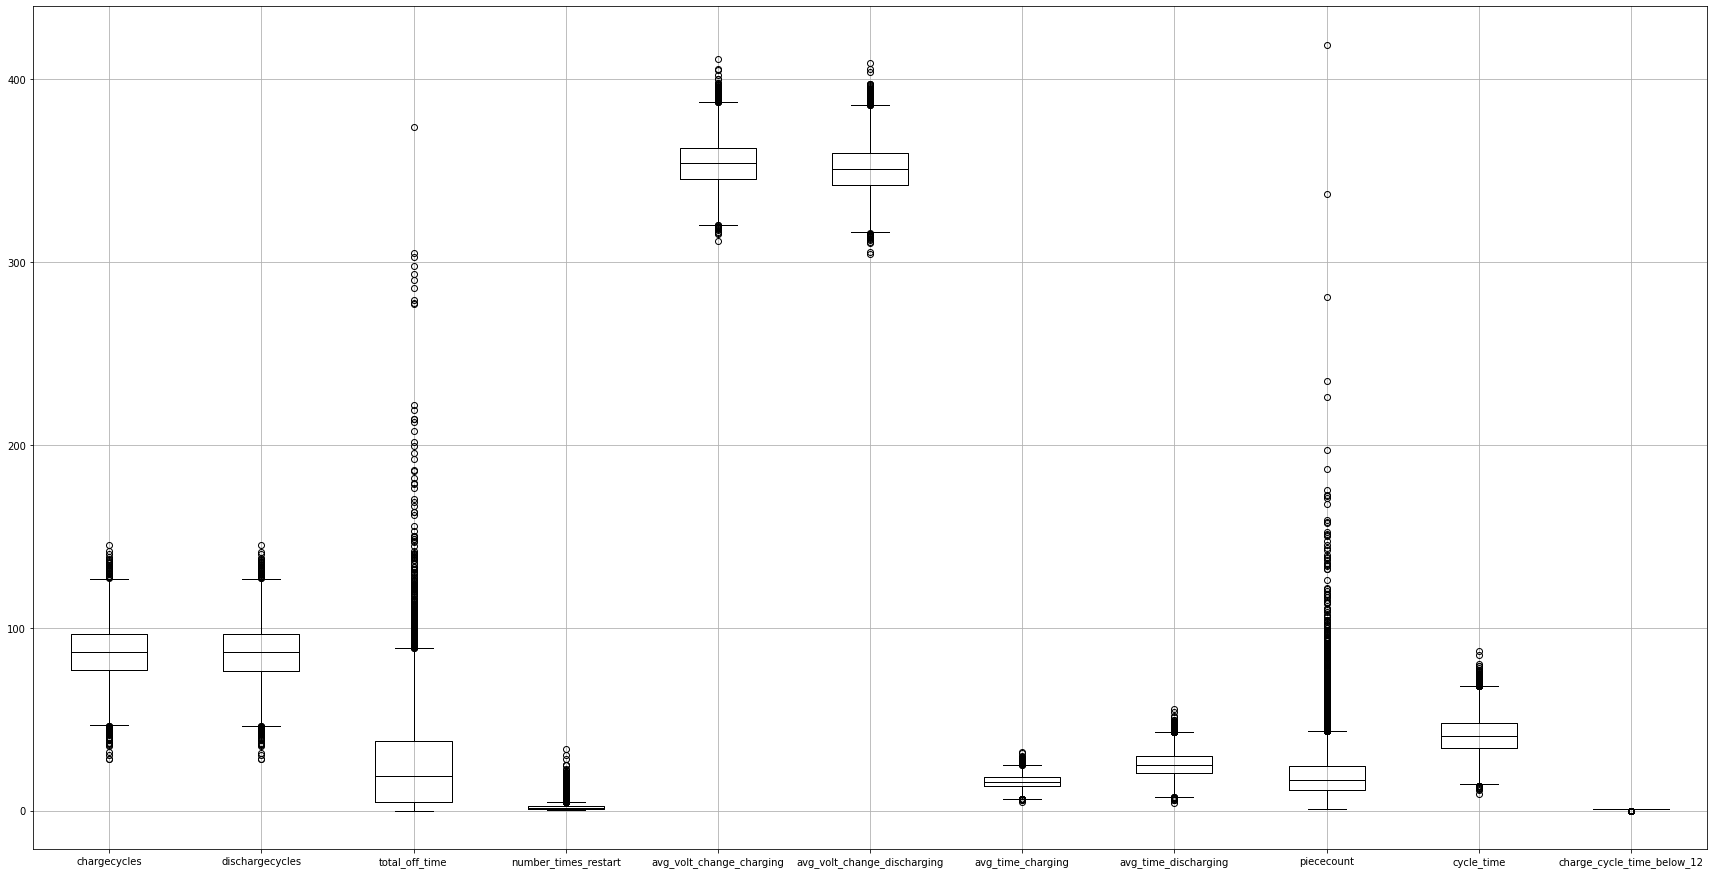

In [ ]:
fail.drop(columns=["fail_7", "max_voltage_day"]).boxplot(figsize=(30,15.5))
plt.show()

#### Analysis of (only) boolean predictor 'charge_cycle_time_below_12':
##### normal charge cycles is 12, bool variable is flag set for when that doesnt happen 

In [ ]:
fail['charge_cycle_time_below_12'].value_counts(normalize=True)

#6993/failed.shape[0] = 85% of devices that failed had charge cycle time below 12 

True     0.849378
False    0.150622
Name: charge_cycle_time_below_12, dtype: float64

In [ ]:
nofail['charge_cycle_time_below_12'].value_counts(normalize=True)

True     0.512364
False    0.487636
Name: charge_cycle_time_below_12, dtype: float64

In [ ]:
#bool col CCTB12 True is when total charges cyles time less than 12 units (which is normal)

norm_charge_false_mask = train['charge_cycle_time_below_12'] == False
norm_charge_true_mask = train['charge_cycle_time_below_12'] == True

In [ ]:
train[norm_charge_false_mask].fail_7.value_counts(normalize = True)
#of the devices that have normal charge cycles, 8.5% fail 

0    0.914601
1    0.085399
Name: fail_7, dtype: float64

In [ ]:
train[norm_charge_true_mask].fail_7.value_counts(normalize = True)
#of the devices that do not have normal charge cycles, 33% fail 

0    0.666165
1    0.333835
Name: fail_7, dtype: float64

#### Analysis of total off time

In [ ]:
tot_0_mask = train['total_off_time'] == 0 
tot_0 = train[tot_0_mask]
tot_0.fail_7.value_counts(normalize=True)

#When total off time is 0, 13% of devices fail

0    0.861761
1    0.138239
Name: fail_7, dtype: float64

In [ ]:
train2.total_off_time.describe()

count    40500.000000
mean        25.258990
std         37.037053
min          0.000000
25%          3.565217
50%         17.097619
75%         37.000000
max       2013.000000
Name: total_off_time, dtype: float64

In [ ]:
tot_max_fail_mask = train['total_off_time'] > 374
tot_max_fail = train[tot_max_fail_mask]
tot_max_fail.fail_7.value_counts()

#when total off time is greater than 374, no devices fail 

0    35
Name: fail_7, dtype: int64

Devices that fail


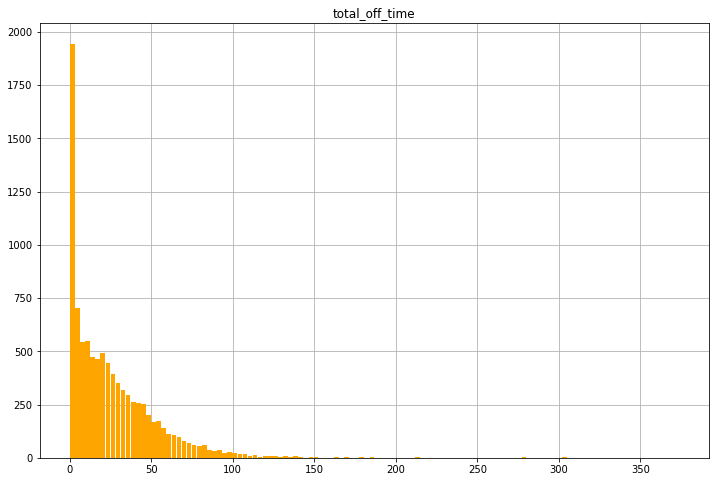

In [ ]:
print('Devices that fail')
display(ax = fail.hist(column='total_off_time', bins=120, figsize=(12,8), color='orange', zorder=2, rwidth=0.9))


Devices that do not fail


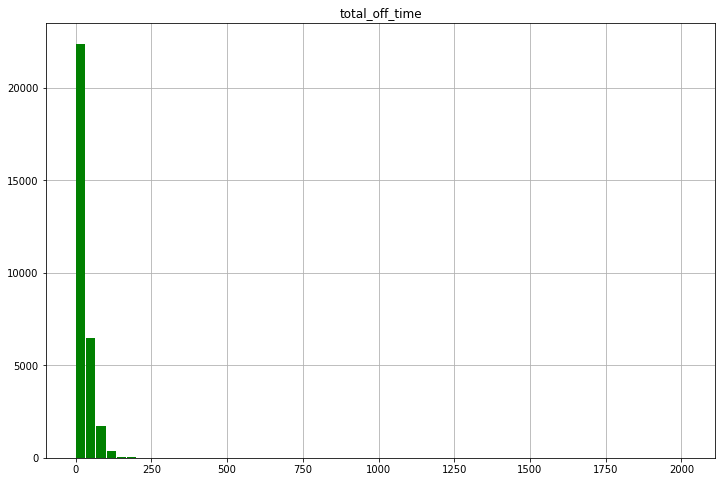

In [ ]:
print('Devices that do not fail')
ax = nofail.hist(column='total_off_time', bins=60, figsize=(12,8), color='green', zorder=2, rwidth=0.9)

## Adding new columns

In [ ]:
ser_charging_rate = train[['charging_rate_lag3', 'charging_rate_lag4', 'charging_rate_lag5',
       'charging_rate_lag6', 'charging_rate_lag7']].mean(axis=1)
ser_discharging_rate = train[['discharging_rate_lag3',
       'discharging_rate_lag4', 'discharging_rate_lag5',
       'discharging_rate_lag6', 'discharging_rate_lag7',
       'discharging_rate_lag8']].mean(axis=1)

train2['AVG_charging_rate'] = ser_charging_rate
train2['AVG_discharging_rate'] = ser_discharging_rate
train2.head()

,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,Date Deployed,charge_cycle_time_below_12,fail_7,AVG_charging_rate,AVG_discharging_rate
deviceid,,,,,,,,,,,,,,,,
28647,50.250000,49.750000,49.000000,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,10/6/19,False,0,0.044667,-1.084444
36175,56.285714,56.000000,36.857143,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,10/27/19,False,0,0.235333,0.087778
16107,80.380952,80.333333,2.333333,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,10/31/19,False,0,-0.276000,-0.368333
27362,91.736842,91.684211,10.789474,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,10/1/19,False,0,0.029333,-0.923333
19463,71.066667,70.733333,14.266667,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,9/13/19,True,0,0.025333,0.045000


In [ ]:
train2['Date Deployed'] = pd.to_datetime(train2['Date Deployed']).dt.strftime('%Y-%m-%d')
years=[]
months=[]

for dates in train2['Date Deployed']:
    dates[1].lstrip('0')
    dates = dates.split("-")
    year = int(dates[0])
    month = int(dates[1])
    years.append(year)
    months.append(month)

train2['Year Deployed'] = years
train2['Month Deployed'] = months
train2['age_of_battery'] = (12*(2021 - train2['Year Deployed']) + 4) - train2['Month Deployed']

train2['Date Deployed'] = pd.to_datetime(train2['Date Deployed']).dt.strftime('%Y%m%d')
train2['Date Deployed'] = train2['Date Deployed'].astype(int)

In [ ]:
# add lag 4,3,2,1 columns back
trainlag3 = train[['deviceid','avg_time_charging_lag1', 'avg_time_charging_lag2','avg_time_charging_lag3', 'avg_time_charging_lag4',
        'avg_time_discharging_lag1', 'avg_time_discharging_lag2', 'avg_time_discharging_lag3', 'avg_time_discharging_lag4',
        'charging_rate_lag3', 'discharging_rate_lag3', 'charging_rate_lag4', 'discharging_rate_lag4']].copy()
trainlag3 = trainlag3.set_index('deviceid')

pd.set_option('display.max_columns', None)
train2 = pd.concat([train2, trainlag3], axis = 1)
train2.head(7)

,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,Date Deployed,charge_cycle_time_below_12,fail_7,AVG_charging_rate,AVG_discharging_rate,Year Deployed,Month Deployed,age_of_battery,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag4,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag4,charging_rate_lag3,discharging_rate_lag3,charging_rate_lag4,discharging_rate_lag4
deviceid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
28647,50.250000,49.750000,49.000000,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,20191006,False,0,0.044667,-1.084444,2019,10,18,5.12,41.11,6.56,4.99,4.37,91.70,15.70,5.85,0.086667,-1.163333,-0.070000,-0.360000
36175,56.285714,56.000000,36.857143,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,20191027,False,0,0.235333,0.087778,2019,10,18,36.60,5.16,6.23,13.64,62.67,6.53,6.16,20.37,0.136667,-0.066667,0.216667,-4.593333
16107,80.380952,80.333333,2.333333,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,20191031,False,0,-0.276000,-0.368333,2019,10,18,5.51,5.04,4.52,25.01,5.13,5.65,4.14,40.69,-0.460000,-2.643333,-0.026667,-0.050000
27362,91.736842,91.684211,10.789474,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,20191001,False,0,0.029333,-0.923333,2019,10,18,4.66,39.85,35.76,4.71,3.93,76.37,60.86,3.74,0.076667,-0.166667,-0.030000,0.013333
19463,71.066667,70.733333,14.266667,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,20190913,True,0,0.025333,0.045000,2019,9,19,5.10,43.24,4.63,40.36,4.69,71.44,3.80,82.70,0.040000,0.066667,0.016667,-0.353333
30054,100.900000,100.550000,10.700000,2.150000,350.345500,346.747500,12.878500,19.621000,4151.600000,6.375000,32.499500,20191005,False,0,-0.000667,0.081667,2019,10,18,27.74,5.12,42.39,4.35,45.90,3.99,75.64,4.21,0.076667,-0.023333,0.396667,-0.360000
26431,72.130435,71.869565,60.304348,1.956522,358.789130,353.025652,17.384783,27.495217,4170.652174,20.500000,44.880000,20190913,False,0,-0.028667,-0.730000,2019,9,19,4.67,5.32,23.99,4.76,3.56,4.62,18.57,3.46,0.270000,-0.350000,0.020000,-0.026667


In [ ]:
# fill null values of AVG_charging_rate & AVG_discharging_rate
mean_charge = train2['AVG_charging_rate'].mean()
mean_discharge = train2['AVG_discharging_rate'].mean()
train2['AVG_charging_rate'].fillna(value=mean_charge, inplace=True)    
train2['AVG_discharging_rate'].fillna(value=mean_charge, inplace=True)

In [ ]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40500 entries, 28647 to 20795
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   chargecycles                 40500 non-null  float64
 1   dischargecycles              40500 non-null  float64
 2   total_off_time               40500 non-null  float64
 3   number_times_restart         40500 non-null  float64
 4   avg_volt_change_charging     40500 non-null  float64
 5   avg_volt_change_discharging  40500 non-null  float64
 6   avg_time_charging            40500 non-null  float64
 7   avg_time_discharging         40500 non-null  float64
 8   max_voltage_day              40500 non-null  float64
 9   piececount                   40500 non-null  float64
 10  cycle_time                   40500 non-null  float64
 11  Date Deployed                40500 non-null  int64  
 12  charge_cycle_time_below_12   40500 non-null  bool   
 13  fail_7      

## More visualizations, looking for patterns in lag 3 charging rate, discharging rate 

In [ ]:
age_categories = train2['age_of_battery'].unique()
age_categories

array([18, 19, 17, 20, 16, 15, 14])

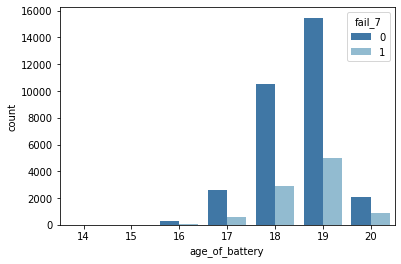

In [ ]:
sns.set_palette('RdBu_r')
sns.countplot(data=train2, x='age_of_battery', hue='fail_7')

In [ ]:
train3  = train2   #train3 is a copy of train2

train3['charging_rate_lag4'] = train3['charging_rate_lag4'].abs()
train3['discharging_rate_lag4'] = train3['discharging_rate_lag4'].abs()
train3['discharging_rate_lag3'] = train3['discharging_rate_lag3'].abs()
train3['charging_rate_lag3'] = train3['charging_rate_lag3'].abs()

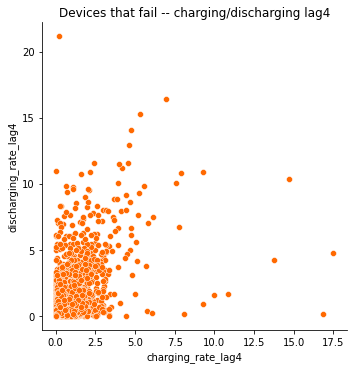

In [ ]:
custom_palette1 = ['#FF6900','#00D084']
custom_palette2 = ['#008000','#228B22']

sns.set_palette(custom_palette1)
sns.relplot(data=train3[train3["fail_7"]==1], x='charging_rate_lag4',
            y='discharging_rate_lag4', kind='scatter').set(title='Devices that fail -- charging/discharging lag4')
plt.show()

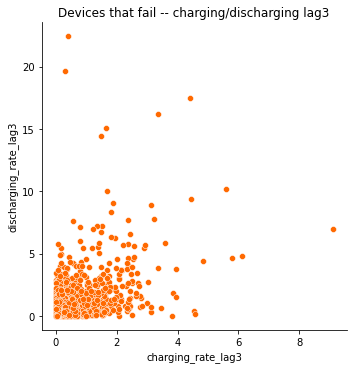

In [ ]:
sns.relplot(data=train3[train3["fail_7"]==1], x='charging_rate_lag3', 
            y='discharging_rate_lag3', kind='scatter').set(title='Devices that fail -- charging/discharging lag3')
plt.show()

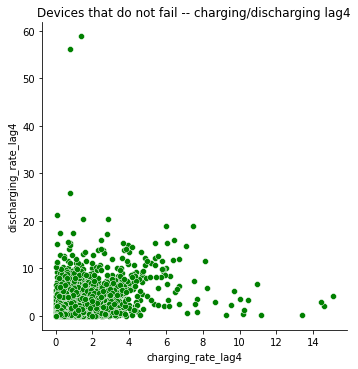

In [ ]:
sns.set_palette(custom_palette2)
sns.relplot(data=train3[train3["fail_7"]==0], x='charging_rate_lag4', 
            y='discharging_rate_lag4', kind='scatter').set(title='Devices that do not fail -- charging/discharging lag4')
plt.show()

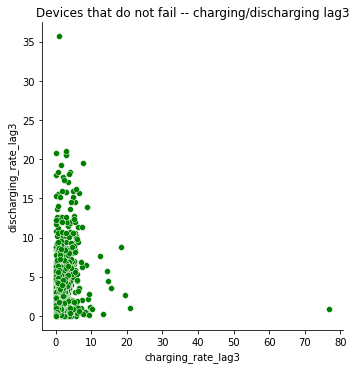

In [ ]:
sns.relplot(data=train3[train3["fail_7"]==0], x='charging_rate_lag3', 
            y='discharging_rate_lag3', kind='scatter').set(title='Devices that do not fail -- charging/discharging lag3')
plt.show()

### Making predictions. We will be using train2 to make predictions: 

In [ ]:
train2 = train2.drop(columns=['Date Deployed'])

In [ ]:
train2.shape

(40500, 30)

In [ ]:
'''
First Model- Logistic Regression, train2

'''
X_train, X_test, y_train, y_test = train_test_split(train2.drop('fail_7', axis = 1), train2['fail_7'])
logreg = linear_model.LogisticRegression(max_iter = 10000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm

array([[7739,   62],
       [2252,   72]])

In [ ]:
cmn

array([[0.9920523 , 0.0079477 ],
       [0.96901893, 0.03098107]])

In [ ]:
'''
Second Logistic Regression Model - train2, scaled with MinMax

'''
#scale on all columns except for dates and response
scale_on = train2[train2.drop(columns = ['Year Deployed', 'Month Deployed', 'age_of_battery', 'fail_7']).columns]
date_cols = train2[['Year Deployed', 'Month Deployed', 'age_of_battery', 'fail_7']]
cols = scale_on.columns
ms = MinMaxScaler()

trainscale = ms.fit_transform(scale_on)
trainscale = pd.DataFrame(trainscale, columns = cols, index=train2.index)
trainscale = pd.concat([trainscale, date_cols], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(trainscale.drop('fail_7', axis = 1), trainscale['fail_7'])
logreg = linear_model.LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm

array([[7731,    0],
       [2394,    0]])

In [ ]:
cmn

array([[1., 0.],
       [1., 0.]])

In [ ]:
'''
Third Logistic Regression Model - train2, standardized

'''
scale_std = train2[train2.drop(columns = ['Year Deployed', 'Month Deployed', 'age_of_battery', 'fail_7']).columns]
date_cols = train2[['Year Deployed', 'Month Deployed', 'age_of_battery', 'fail_7']]
cols = scale_on.columns
scaler = StandardScaler()

trainstd = scaler.fit_transform(scale_std)
trainstd = pd.DataFrame(trainstd, columns = cols, index=train2.index)
trainstd = pd.concat([trainstd, date_cols], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(trainstd.drop('fail_7', axis = 1), trainstd['fail_7'])
logreg = linear_model.LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm

array([[7695,   61],
       [2290,   79]])

In [ ]:
cmn

array([[0.99213512, 0.00786488],
       [0.9666526 , 0.0333474 ]])

In [ ]:
'''
Logistic regression is not a good model 
'''

'\nLogistic regression is not a good model \n'

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

In [ ]:
'''
Decision Tree on train2
'''
y = train2["fail_7"]  # Specify one column as the target variable
X = train2.drop('fail_7', axis = 1)  # Specify at least two columns as features


# Split the data into train and test subsets
# You can adjust the test size and random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28350, 29), (12150, 29), (28350,), (12150,))

In [ ]:
'''

Decison tree classification template from DataCamp:

'''
# Define a parameter grid with distributions of possible parameters to use
rs_param_grid = {
    "criterion": ["gini"],
    "max_depth": list((range(4, 12))),
    "min_samples_split": list((range(2, 5))),
    "min_samples_leaf": list((range(1, 5))),
    "ccp_alpha": [0, 0.001, 0.01, 0.1],
}

# Create a decision tree classifer object
clf = DecisionTreeClassifier(random_state=42)

# Instantiate RandomizedSearchCV() with clf and the parameter grid
clf_rs = RandomizedSearchCV(
    estimator=clf,
    param_distributions=rs_param_grid,
    cv=3,  # Number of folds
    n_iter=20,  # Number of parameter candidate settings to sample
    verbose=3,  # The higher this is, the more messages are outputed
    random_state=42,
)

# Train the model on the training set
clf_rs.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", clf_rs.best_params_)
print("Best accuracy found: ", clf_rs.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END ccp_alpha=0.01, criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3;, score=0.786 total time=   0.6s
[CV 2/3] END ccp_alpha=0.01, criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3;, score=0.792 total time=   0.6s
[CV 3/3] END ccp_alpha=0.01, criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3;, score=0.793 total time=   0.6s
[CV 1/3] END ccp_alpha=0.01, criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3;, score=0.786 total time=   0.5s
[CV 2/3] END ccp_alpha=0.01, criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3;, score=0.792 total time=   0.5s
[CV 3/3] END ccp_alpha=0.01, criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3;, score=0.793 total time=   0.5s
[CV 1/3] END ccp_alpha=0.1, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3;, score=0.769 total time=   0.5s
[CV 2/3] END ccp_alp

In [ ]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "criterion": "gini",  # Function to measure the quality of a split: 'Gini' or 'Entropy'
    "max_depth": 5,  # Max depth of the tree
    "min_samples_split": 2,  # Min number of samples required to split a node
    "min_samples_leaf": 3,  # Min number of samples required at a leaf node
    "ccp_alpha": 0.001,  # Cost complexity parameter for pruning
    "random_state": 42,
}

# Create a DecisionTreeClassifier object with the parameters above
clf = DecisionTreeClassifier(**params)

# Train the decision tree classifer on the train set
clf = clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8102880658436215


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm

array([[8806,  505],
       [1800, 1039]])

In [ ]:
cmn

array([[0.94576308, 0.05423692],
       [0.63402607, 0.36597393]])

[Text(0.375, 0.9166666666666666, 'charge_cycle_time_below_12 <= 0.5\ngini = 0.356\nsamples = 28350\nvalue = [21788, 6562]\nclass = 0'),
 Text(0.25, 0.75, 'gini = 0.152\nsamples = 11626\nvalue = [10666, 960]\nclass = 0'),
 Text(0.5, 0.75, 'discharging_rate_lag3 <= 0.122\ngini = 0.446\nsamples = 16724\nvalue = [11122, 5602]\nclass = 0'),
 Text(0.25, 0.5833333333333334, 'avg_volt_change_charging <= 352.189\ngini = 0.364\nsamples = 11805\nvalue = [8980, 2825]\nclass = 0'),
 Text(0.125, 0.4166666666666667, 'gini = 0.324\nsamples = 6541\nvalue = [5209, 1332]\nclass = 0'),
 Text(0.375, 0.4166666666666667, 'gini = 0.406\nsamples = 5264\nvalue = [3771, 1493]\nclass = 0'),
 Text(0.75, 0.5833333333333334, 'charging_rate_lag3 <= 0.118\ngini = 0.492\nsamples = 4919\nvalue = [2142, 2777]\nclass = 1'),
 Text(0.625, 0.4166666666666667, 'discharging_rate_lag3 <= 0.198\ngini = 0.458\nsamples = 3953\nvalue = [1405, 2548]\nclass = 1'),
 Text(0.5, 0.25, 'charging_rate_lag3 <= 0.045\ngini = 0.498\nsamples =

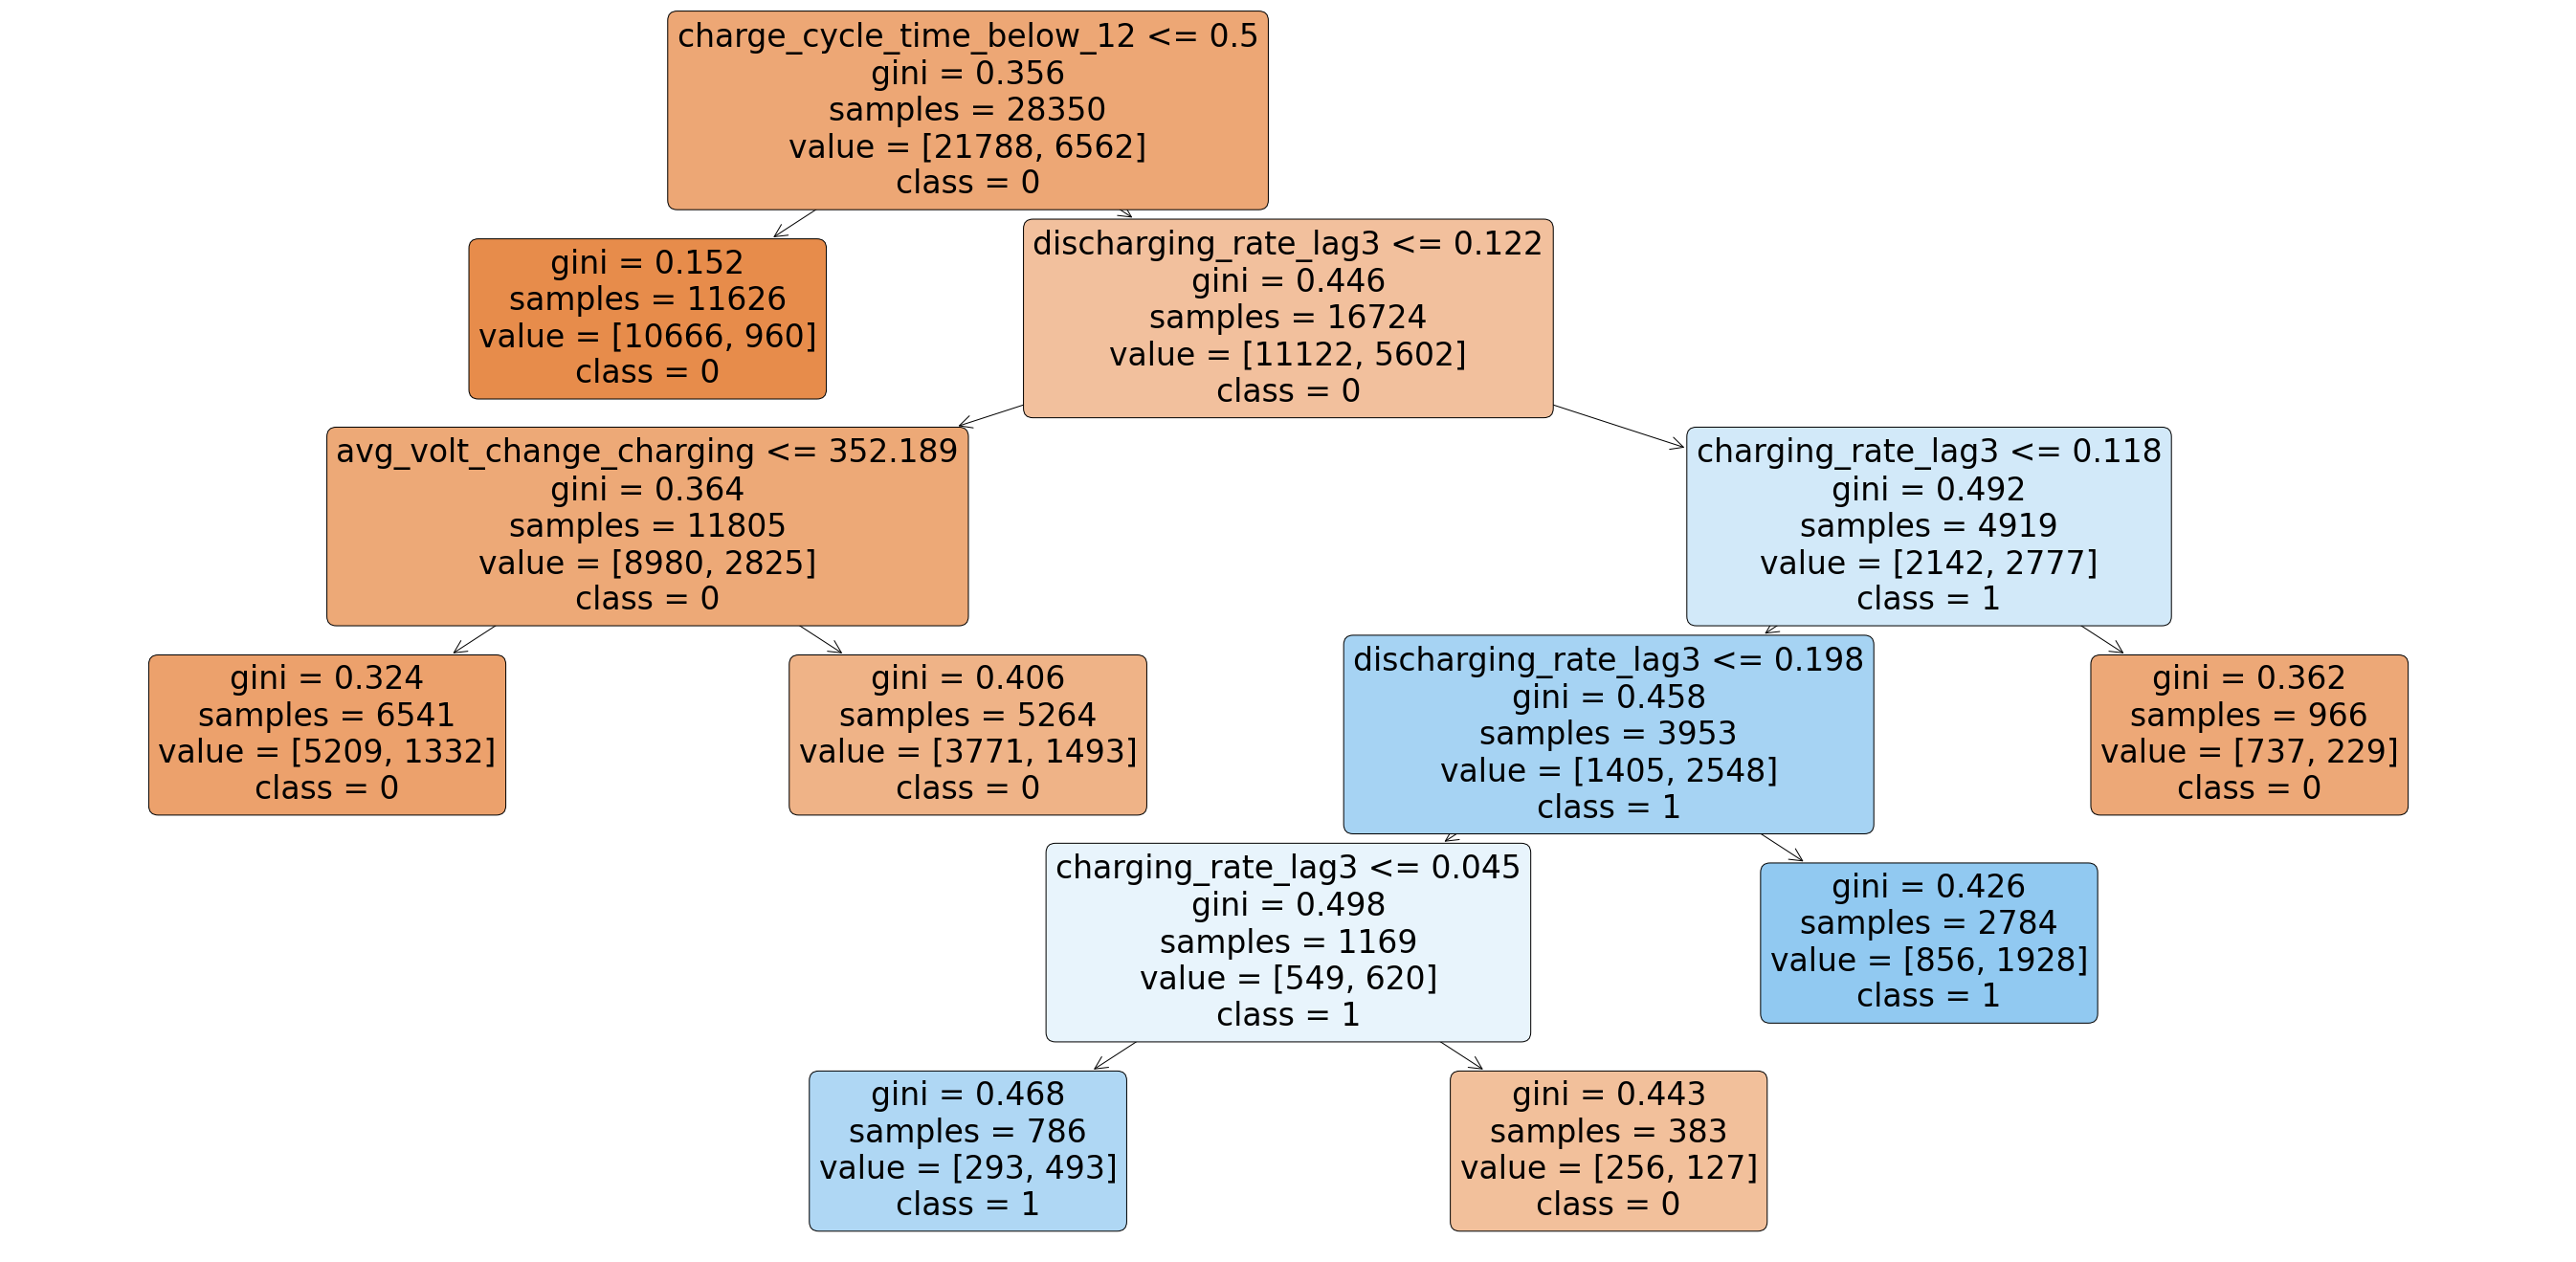

In [ ]:
plt.figure(figsize=(48, 24))
tree.plot_tree(clf, feature_names=X.columns, class_names = ['0','1'], filled = True, rounded = True)

In [ ]:
'''
Decision Tree on standardized train2 
'''
y = trainstd["fail_7"]  # Specify one column as the target variable
X = trainstd.drop('fail_7', axis = 1)  # Specify at least two columns as features


# Split the data into train and test subsets
# You can adjust the test size and random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

clf = DecisionTreeClassifier(random_state=42)
clf_rs.fit(X_train, y_train)
print("Best parameters found: ", clf_rs.best_params_)
print("Best accuracy found: ", clf_rs.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END ccp_alpha=0.01, criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3;, score=0.786 total time=   0.5s
[CV 2/3] END ccp_alpha=0.01, criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3;, score=0.792 total time=   0.5s
[CV 3/3] END ccp_alpha=0.01, criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3;, score=0.793 total time=   0.5s
[CV 1/3] END ccp_alpha=0.01, criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3;, score=0.786 total time=   0.4s
[CV 2/3] END ccp_alpha=0.01, criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3;, score=0.792 total time=   0.4s
[CV 3/3] END ccp_alpha=0.01, criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3;, score=0.793 total time=   0.4s
[CV 1/3] END ccp_alpha=0.1, criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3;, score=0.769 total time=   0.5s
[CV 2/3] END ccp_alp

In [ ]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "criterion": "gini",  # Function to measure the quality of a split: 'Gini' or 'Entropy'
    "max_depth": 7,  # Max depth of the tree
    "min_samples_split": 4,  # Min number of samples required to split a node
    "min_samples_leaf": 3,  # Min number of samples required at a leaf node
    "ccp_alpha": 0.001,  # Cost complexity parameter for pruning
    "random_state": 42,
}

# Create a DecisionTreeClassifier object with the parameters above
clf = DecisionTreeClassifier(**params)

# Train the decision tree classifer on the train set
clf = clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm

array([[8806,  505],
       [1800, 1039]])

In [ ]:
cmn

array([[0.94576308, 0.05423692],
       [0.63402607, 0.36597393]])

[Text(0.375, 0.9166666666666666, 'charge_cycle_time_below_12 <= -0.184\ngini = 0.356\nsamples = 28350\nvalue = [21788, 6562]'),
 Text(0.25, 0.75, 'gini = 0.152\nsamples = 11626\nvalue = [10666, 960]'),
 Text(0.5, 0.75, 'discharging_rate_lag3 <= -0.367\ngini = 0.446\nsamples = 16724\nvalue = [11122, 5602]'),
 Text(0.25, 0.5833333333333334, 'avg_volt_change_charging <= 0.06\ngini = 0.364\nsamples = 11805\nvalue = [8980, 2825]'),
 Text(0.125, 0.4166666666666667, 'gini = 0.324\nsamples = 6541\nvalue = [5209, 1332]'),
 Text(0.375, 0.4166666666666667, 'gini = 0.406\nsamples = 5264\nvalue = [3771, 1493]'),
 Text(0.75, 0.5833333333333334, 'charging_rate_lag3 <= -0.242\ngini = 0.492\nsamples = 4919\nvalue = [2142, 2777]'),
 Text(0.625, 0.4166666666666667, 'discharging_rate_lag3 <= -0.301\ngini = 0.458\nsamples = 3953\nvalue = [1405, 2548]'),
 Text(0.5, 0.25, 'charging_rate_lag3 <= -0.344\ngini = 0.498\nsamples = 1169\nvalue = [549, 620]'),
 Text(0.375, 0.08333333333333333, 'gini = 0.468\nsample

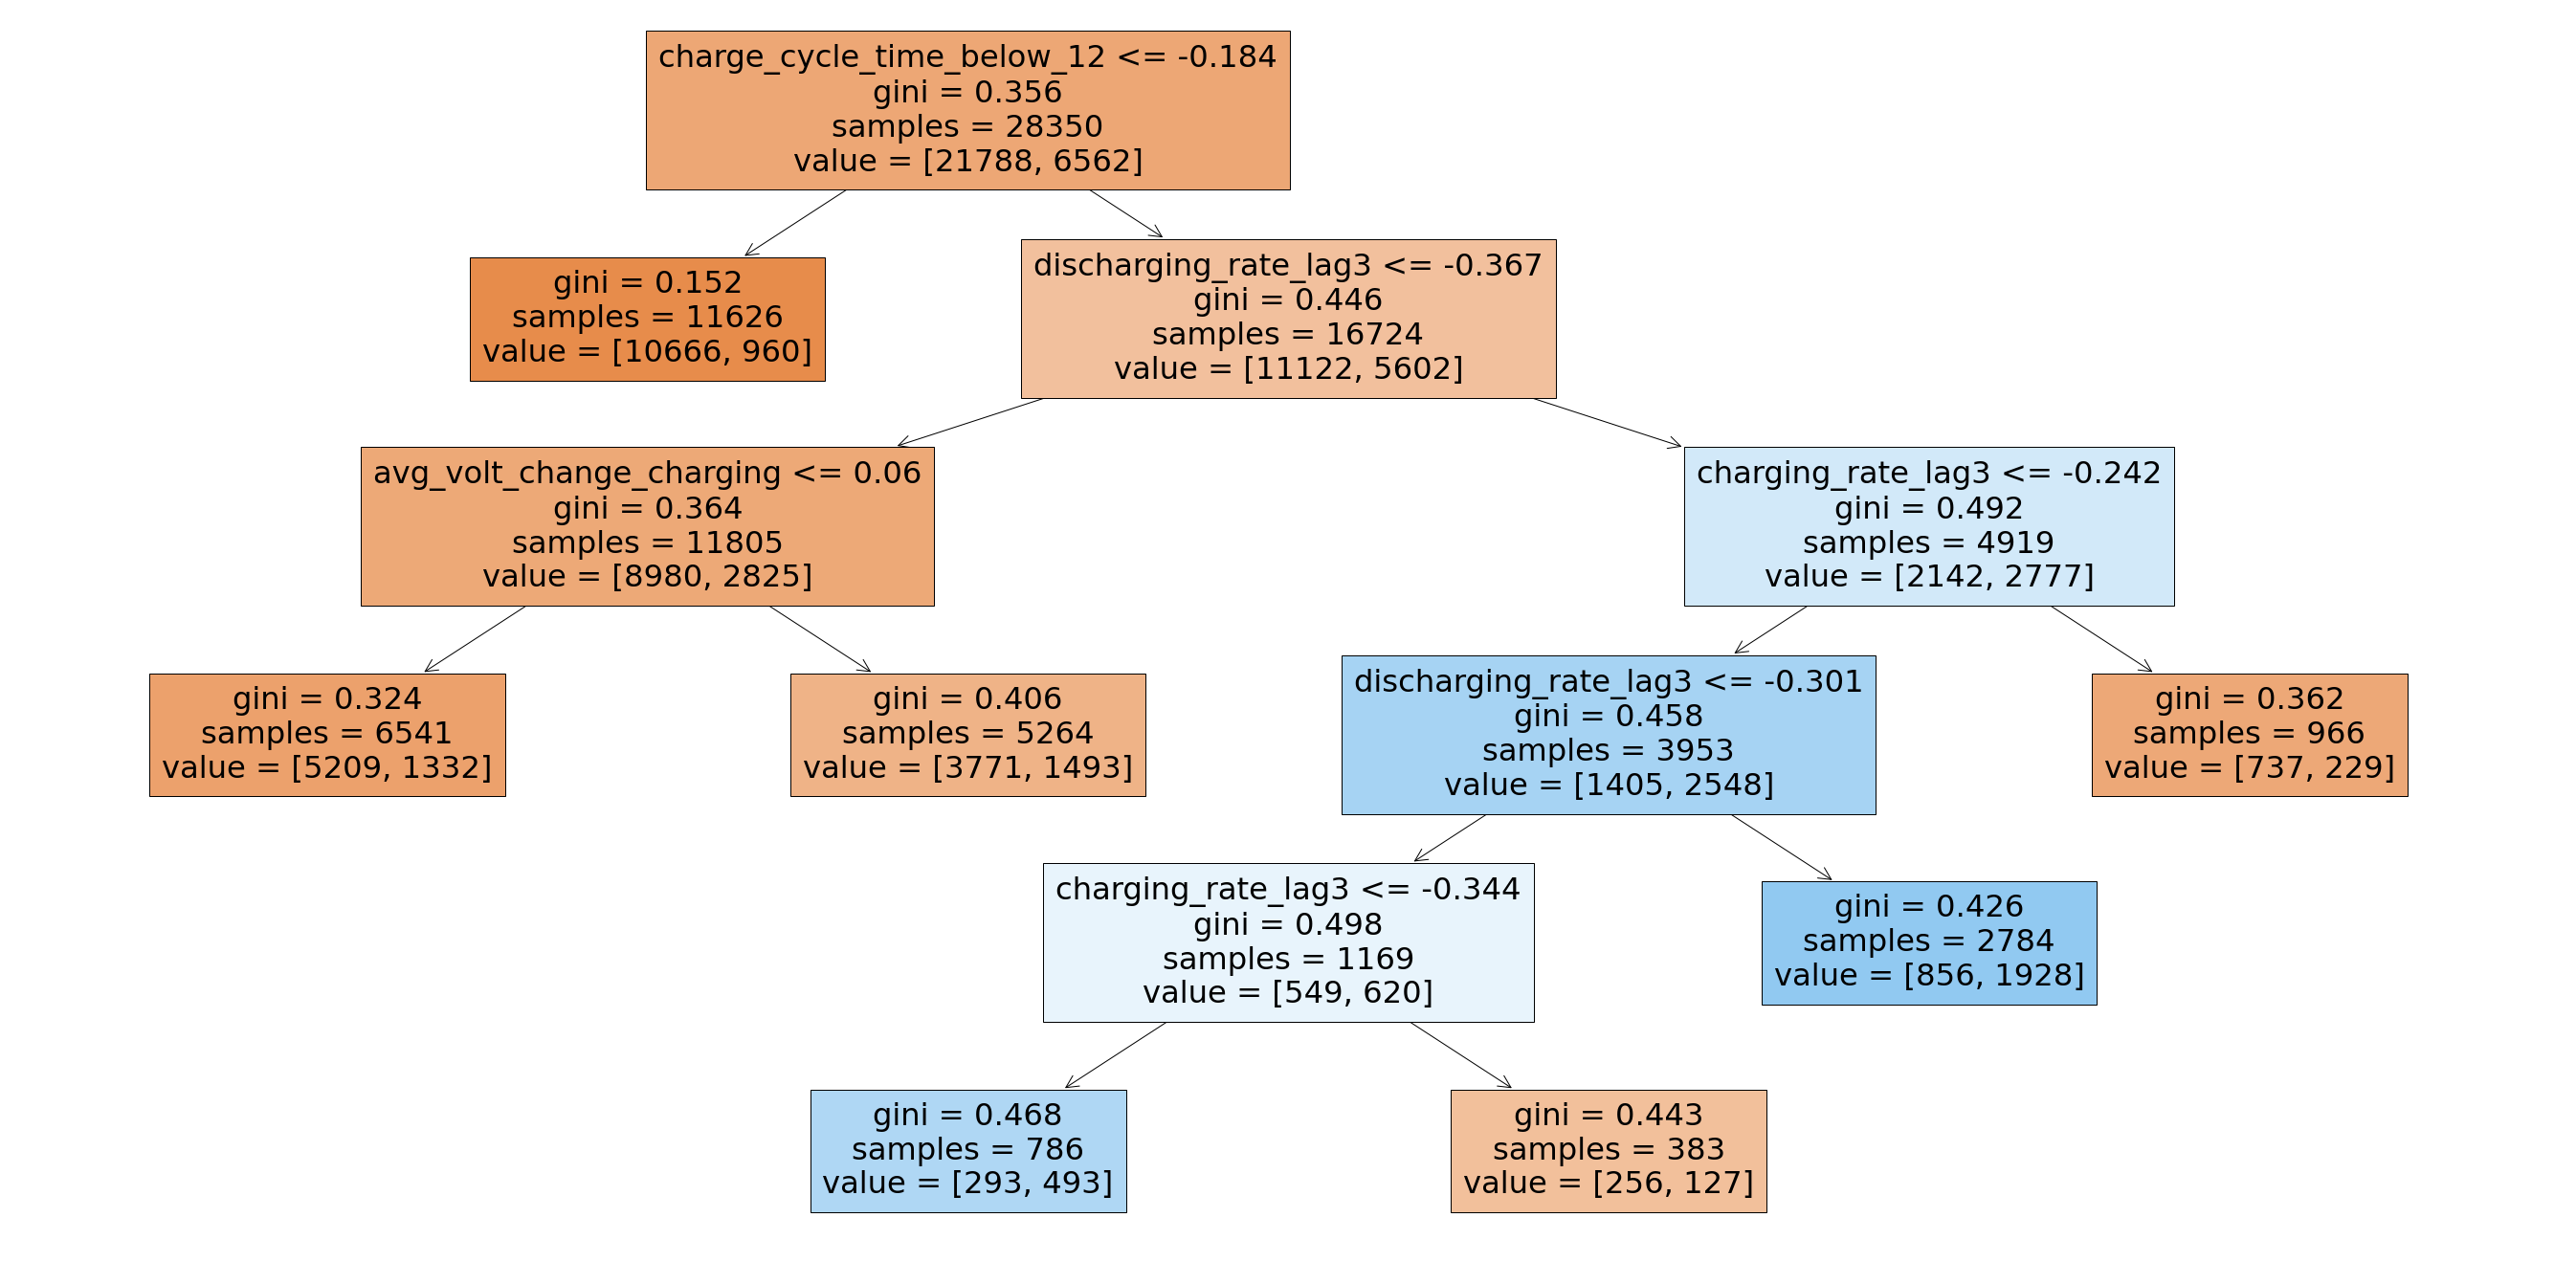

In [ ]:
plt.figure(figsize=(48, 24))
tree.plot_tree(clf, feature_names=X.columns, filled = True)

#### XGBoost

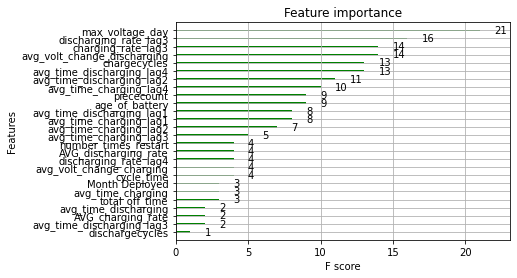

In [ ]:
data_dmatrix = xgb.DMatrix(data = X, label = y)
params = {"objective": 'binary:logistic', 
          "colsample_bytree" : 0.3,
          "learning_rate" : 0.1,
            "max_depth" : 5, 
          "alpha" : 10
}

cv_results = xgb.cv(dtrain = data_dmatrix, params = params, nfold = 3,
                   num_boost_round = 50, early_stopping_rounds = 10, 
                    metrics = "rmse", seed = 123)

xg_reg = xgb.train(params = params, dtrain = data_dmatrix, num_boost_round =10 )
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20,20]
plt.show()


In [ ]:
'''
XGBoost on train2
'''

y = train2['fail_7']
X = train2.drop('fail_7', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 106)

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.8, learning_rate = 0.1,
                      max_depth = 6, alpha = 3, n_estimators= 70)
xg_reg.fit(X_train, y_train)
pred = xg_reg.predict(X_test)
cm = confusion_matrix(y_test, pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmn

array([[0.94962445, 0.05037555],
       [0.6454432 , 0.3545568 ]])

In [ ]:
cmn

array([[0.94962445, 0.05037555],
       [0.6454432 , 0.3545568 ]])

#### Trying unsupervised learning method: K Means 

In [ ]:
'''
K Means on train2 
'''
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans = kmeans.fit(train2)
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 16744 out of 40500 samples were correctly labeled.
Accuracy score: 0.41


In [ ]:
'''
K Means on train2 min/max scaled
'''
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans = kmeans.fit(trainscale)
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 19386 out of 40500 samples were correctly labeled.
Accuracy score: 0.48


In [ ]:
'''
K Means on train2 standardized
'''
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans = kmeans.fit(trainstd)
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 20958 out of 40500 samples were correctly labeled.
Accuracy score: 0.52
